## PCA 

/media/rauzaruk/HDD/CSE-472-Machine-Learning-Sessional/.env/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


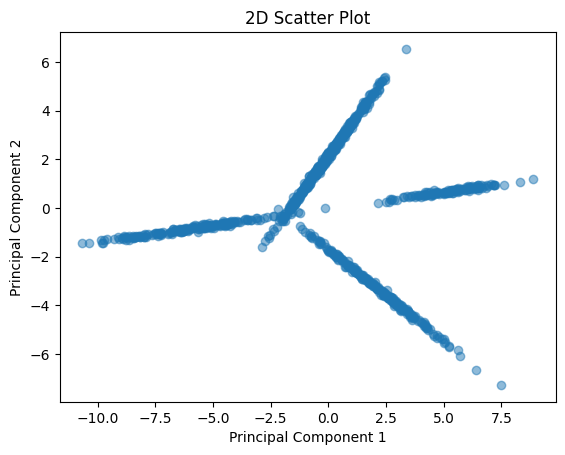

/media/rauzaruk/HDD/CSE-472-Machine-Learning-Sessional/.env/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


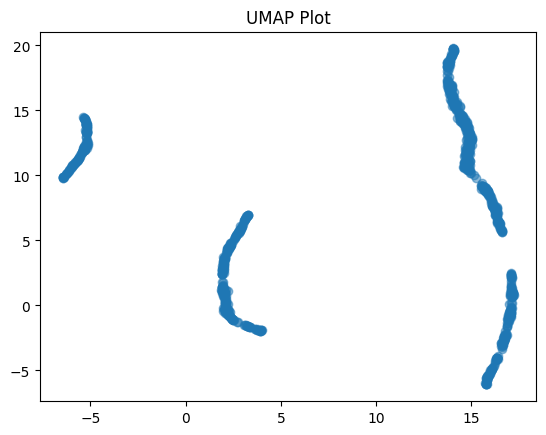

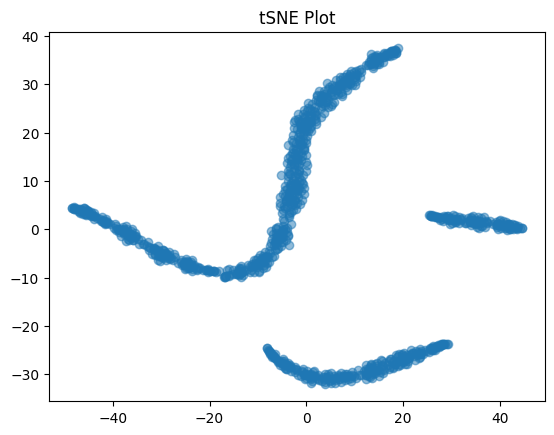

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from umap import UMAP

data = np.loadtxt("pca_data_online_1.txt")

data_mean = np.mean(data, axis=0)
data_centered = data - data_mean

cov_matrix = np.cov(data_centered, rowvar=False)

eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

top_2_eigenvectors = eigenvectors[:, :2]
data_projected = np.dot(data_centered, top_2_eigenvectors)

plt.scatter(data_projected[:, 0], data_projected[:, 1], alpha=0.5)
plt.title("2D Scatter Plot")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

umap = UMAP(n_components=2, random_state=42)
data_umap = umap.fit_transform(data)

plt.scatter(data_umap[:, 0], data_umap[:, 1], alpha=0.5)
plt.title("UMAP Plot")
plt.show()

tsne = TSNE(n_components=2, random_state=42)
data_tsne = tsne.fit_transform(data)

plt.scatter(data_tsne[:, 0], data_tsne[:, 1], alpha=0.5)
plt.title("tSNE Plot")
plt.show()


## EM Algorithm

In [6]:
import numpy as np
from scipy.special import factorial

data = np.loadtxt("em_data_online_1.txt")

np.random.seed(42)
lambda_1 = np.random.rand() + 2  
lambda_2 = np.random.rand() + 2  
pi_1 = 0.5  
pi_2 = 0.5  
tolerance = 1e-6
max_iterations = 1000
n = len(data)

for iteration in range(max_iterations):
    prob_1 = pi_1 * (np.exp(-lambda_1) * (lambda_1**data) / factorial(data))
    prob_2 = pi_2 * (np.exp(-lambda_2) * (lambda_2**data) / factorial(data))
    gamma_1 = prob_1 / (prob_1 + prob_2)
    gamma_2 = prob_2 / (prob_1 + prob_2)
    
    lambda_1_new = np.sum(gamma_1 * data) / np.sum(gamma_1)
    lambda_2_new = np.sum(gamma_2 * data) / np.sum(gamma_2)
    pi_1_new = np.mean(gamma_1)
    pi_2_new = np.mean(gamma_2)
    
    if (abs(lambda_1_new - lambda_1) < tolerance and
        abs(lambda_2_new - lambda_2) < tolerance and
        abs(pi_1_new - pi_1) < tolerance and
        abs(pi_2_new - pi_2) < tolerance):
        break

    lambda_1, lambda_2 = lambda_1_new, lambda_2_new
    pi_1, pi_2 = pi_1_new, pi_2_new

print(f"Converged in {iteration+1} iterations")
print(f"Mean number of children (with family planning): {lambda_1:.4f}")
print(f"Mean number of children (without family planning): {lambda_2:.4f}")
print(f"Proportion of families (with family planning): {pi_1:.4f}")
print(f"Proportion of families (without family planning): {pi_2:.4f}")


Converged in 433 iterations
Mean number of children (with family planning): 10.7197
Mean number of children (without family planning): 15.5448
Proportion of families (with family planning): 0.4922
Proportion of families (without family planning): 0.5078
